<a href="https://colab.research.google.com/github/KarthikTummala18/INFO-5731-Computational-Methods-for-Information-Systems-/blob/main/Tummala_Karthik_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [8]:
import pandas as pd
import re
import math
from collections import defaultdict
from collections import Counter

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/KarthikTummala18/INFO-5731-Computational-Methods-for-Information-Systems-/main/narrators_data.csv')
df.head(5)

,name,bio,interview_title,interview_details,interview_link,narrator_url
0,Kay Aiko Abe,"Nisei female. Born May 9, 1927, in Selleck, Wa...",Kay Aiko Abe Interview — ddr-densho-1000-232,"December 2, 2008.\n Seattle, Washington.0...",https://ddr.densho.org/ddr-densho-1000-232/,https://ddr.densho.org/narrators/361/
1,Art Abe,"Nisei male. Born June 12, 1921, in Seattle, Wa...",Art Abe Interview — ddr-densho-1000-206,"January 24, 2008.\n Seattle, Washington.0...",https://ddr.densho.org/ddr-densho-1000-206/,https://ddr.densho.org/narrators/291/
2,Sharon Tanagi Aburano,"Nisei female. Born October 31, 1925, in Seattl...",Sharon Tanagi Aburano Interview II — ddr-densh...,"April 3, 2008.\n Seattle, Washington.02:2...",https://ddr.densho.org/ddr-densho-1000-209/,https://ddr.densho.org/narrators/293/
3,Sharon Tanagi Aburano,"Nisei female. Born October 31, 1925, in Seattl...",Sharon Tanagi Aburano Interview I — ddr-densho...,"March 25, 2008.\n Seattle, Washington.02:...",https://ddr.densho.org/ddr-densho-1000-208/,https://ddr.densho.org/narrators/293/
4,Toshiko Aiboshi,"Nisei female. Born July 8, 1928, in Boyle Heig...",Toshiko Aiboshi Interview — ddr-manz-1-112,"January 20, 2011.\n Culver City, Californ...",https://ddr.densho.org/ddr-manz-1-112/,https://ddr.densho.org/narrators/597/


In [53]:
df = df.dropna()

In [54]:
df = df.drop_duplicates()

In [55]:
print(df['bio'].head(5))

0    Nisei female. Born May 9, 1927, in Selleck, Wa...
1    Nisei male. Born June 12, 1921, in Seattle, Wa...
2    Nisei female. Born October 31, 1925, in Seattl...
3    Nisei female. Born October 31, 1925, in Seattl...
4    Nisei female. Born July 8, 1928, in Boyle Heig...
Name: bio, dtype: object


In [42]:
#(1) Count the frequency of all the N-grams (N=3) and (N=2).

df = df['bio'].drop_duplicates()
def get_ngrams(text, n):
    if isinstance(text, str):
        words = text.split()
        ngrams = zip(*[words[i:] for i in range(n)])
        return [' '.join(ngram) for ngram in ngrams]
    else:
        return []
def count_ngrams(ngrams_list):
    ngram_count = {}  # Dictionary to hold ngram counts
    for ngram in ngrams_list:
        if ngram in ngram_count:
            ngram_count[ngram] += 1
        else:
            ngram_count[ngram] = 1
    return ngram_count

bio_features = []
bigram_results = []
trigram_results = []


for bio in df:
    bigrams = get_ngrams(bio, 2)
    trigrams = get_ngrams(bio, 3)
    bigram_counts = count_ngrams(bigrams)
    trigram_counts = count_ngrams(trigrams)
    bio_features.append(bio)
    bigram_results.append(bigram_counts)
    trigram_results.append(trigram_counts)
result_list = []
for i in range(len(bio_features)):
    result_list.append({
        'bio_feature': bio_features[i],
        'bigram_result': bigram_results[i],
        'trigram_result': trigram_results[i]
    })

for result in result_list[:100]:
    print(f"Bio Feature: {result['bio_feature']}")
    print(f"Bigram Result: {result['bigram_result']}")
    print(f"Trigram Result: {result['trigram_result']}")
    print('-' * 150)



Bio Feature: Nisei female. Born May 9, 1927, in Selleck, Washington. Spent much of childhood in Beaverton, Oregon, where father owned a farm. Influenced at an early age by parents' conversion to Christianity. During World War II, removed to the Portland Assembly Center, Oregon, and the Minidoka concentration camp, Idaho. After the war, worked to establish a successful volunteer program to feed the homeless in Seattle, Washington.
Bigram Result: {'Nisei female.': 1, 'female. Born': 1, 'Born May': 1, 'May 9,': 1, '9, 1927,': 1, '1927, in': 1, 'in Selleck,': 1, 'Selleck, Washington.': 1, 'Washington. Spent': 1, 'Spent much': 1, 'much of': 1, 'of childhood': 1, 'childhood in': 1, 'in Beaverton,': 1, 'Beaverton, Oregon,': 1, 'Oregon, where': 1, 'where father': 1, 'father owned': 1, 'owned a': 1, 'a farm.': 1, 'farm. Influenced': 1, 'Influenced at': 1, 'at an': 1, 'an early': 1, 'early age': 1, 'age by': 1, "by parents'": 1, "parents' conversion": 1, 'conversion to': 1, 'to Christianity.': 1

In [75]:
def count_ngrams_and_unigrams(df):
    bigram_counts = {}
    unigram_counts = {}

    for bio in df:
        bigrams = get_ngrams(bio, 2)

        for bigram in bigrams:
            bigram_counts[bigram] = bigram_counts.get(bigram, 0) + 1

            words = bigram.split()
            for word in words:
                unigram_counts[word] = unigram_counts.get(word, 0) + 1

    return bigram_counts, unigram_counts

bigram_counts, unigram_counts = count_ngrams_and_unigrams(df)

bigram_probabilities = {}

for bigram in bigram_counts:
    w1, w2 = bigram.split()
    count_w1 = unigram_counts.get(w1, 0)

    if count_w1 > 0:
        bigram_probabilities[bigram] = bigram_counts[bigram] / count_w1

results = []

for bio in df:
    bigrams = get_ngrams(bio, 2)
    bigram_probabilities_for_bio = []

    for bigram in bigrams:
        probability = bigram_probabilities.get(bigram, 0)
        bigram_probabilities_for_bio.append(f"'{bigram}' (Probability: {probability:.4f})")

    results.append({"bio": bio, "bigrams_and_probabilities": ", ".join(bigram_probabilities_for_bio)})

df_results = pd.DataFrame(results)

for index, row in df_results.head(100).iterrows():
    print(f"Bio: {row['bio']}")
    print(f"Bigrams and Probabilities: {row['bigrams_and_probabilities']}")
    print('-' * 150)


Bio: Nisei female. Born May 9, 1927, in Selleck, Washington. Spent much of childhood in Beaverton, Oregon, where father owned a farm. Influenced at an early age by parents' conversion to Christianity. During World War II, removed to the Portland Assembly Center, Oregon, and the Minidoka concentration camp, Idaho. After the war, worked to establish a successful volunteer program to feed the homeless in Seattle, Washington.
Bigrams and Probabilities: 'Nisei female.' (Probability: 0.3802), 'female. Born' (Probability: 0.4797), 'Born May' (Probability: 0.0432), 'May 9,' (Probability: 0.0305), '9, 1927,' (Probability: 0.0400), '1927, in' (Probability: 0.4730), 'in Selleck,' (Probability: 0.0006), 'Selleck, Washington.' (Probability: 0.3750), 'Washington. Spent' (Probability: 0.0436), 'Spent much' (Probability: 0.0204), 'much of' (Probability: 0.2500), 'of childhood' (Probability: 0.0024), 'childhood in' (Probability: 0.3700), 'in Beaverton,' (Probability: 0.0003), 'Beaverton, Oregon,' (Prob

In [73]:
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

def extract_noun_phrases(text):
    words = tokenize(text)
    noun_phrases = []
    phrase = []

    for word in words:
        if re.match(r'.*(s|n|e)$', word):
            if phrase:
                phrase.append(word)
            else:
                phrase = [word]
        elif phrase:
            noun_phrases.append(' '.join(phrase))
            phrase = []
    if phrase:
        noun_phrases.append(' '.join(phrase))

    return noun_phrases

def count_noun_phrase_frequencies(df):
    noun_phrase_counts = Counter()

    for bio in df:
        noun_phrases = extract_noun_phrases(bio)
        noun_phrase_counts.update(noun_phrases)
    return noun_phrase_counts

def calculate_relative_probabilities(df):
    total_noun_phrase_counts = count_noun_phrase_frequencies(df)
    max_frequency = max(total_noun_phrase_counts.values())

    results = []

    for bio in df:
        noun_phrases = extract_noun_phrases(bio)
        review_noun_phrase_counts = Counter(noun_phrases)

        relative_probabilities = {}
        for noun_phrase, count in review_noun_phrase_counts.items():
            relative_probabilities[noun_phrase] = count / max_frequency

        results.append({"bio": bio, "relative_probabilities": relative_probabilities})

    return pd.DataFrame(results)

df_results = calculate_relative_probabilities(df)

for index, row in df_results.head(100).iterrows():
    print(f"Bio: {row['bio']}")
    print(f"Relative Probabilities: {row['relative_probabilities']}")
    print('-' * 150)


Bio: Nisei female. Born May 9, 1927, in Selleck, Washington. Spent much of childhood in Beaverton, Oregon, where father owned a farm. Influenced at an early age by parents' conversion to Christianity. During World War II, removed to the Portland Assembly Center, Oregon, and the Minidoka concentration camp, Idaho. After the war, worked to establish a successful volunteer program to feed the homeless in Seattle, Washington.
Relative Probabilities: {'female born': 0.0004014452027298274, 'in': 0.0004014452027298274, 'washington': 0.0004014452027298274, 'in beaverton oregon where': 0.0004014452027298274, 'an': 0.0004014452027298274, 'age': 0.0004014452027298274, 'parents conversion': 0.0004014452027298274, 'the': 0.0012043356081894822, 'oregon': 0.0004014452027298274, 'concentration': 0.0004014452027298274, 'the homeless in seattle washington': 0.0004014452027298274}
-----------------------------------------------------------------------------------------------------------------------------

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [79]:
#(1) To build the documents-terms weights (tf * idf) matrix.
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

def compute_tf(doc):
    words = tokenize(doc)
    word_count = len(words)
    tf_dict = defaultdict(float)

    for word in words:
        tf_dict[word] = tf_dict[word] + 1

    for word in tf_dict:
        tf_dict[word] /= word_count
    return tf_dict

def compute_idf(corpus):
    N = len(corpus)
    idf_dict = defaultdict(float)

    doc_count = defaultdict(int)

    for doc in corpus:
        unique_words = set(tokenize(doc))
        for word in unique_words:
            doc_count[word] += 1

    for word, count in doc_count.items():
        idf_dict[word] = math.log(N / count) + 1

    return idf_dict

def compute_tfidf(corpus):
    idf_dict = compute_idf(corpus)

    tfidf_matrix = []

    for doc in corpus:
        tf_dict = compute_tf(doc)
        tfidf_doc = {}

        for word, tf_value in tf_dict.items():
            idf_value = idf_dict.get(word, 0)
            tfidf_doc[word] = tf_value * idf_value

        tfidf_matrix.append(tfidf_doc)

    return tfidf_matrix

def display_tfidf(tfidf_matrix):
    for i, doc_tfidf in enumerate(tfidf_matrix):
        print(f"Document {i+1}:")
        for word, tfidf_value in doc_tfidf.items():
            print(f"  {word}: {tfidf_value:.4f}")
        print()

corpus = df.tolist()  # Convert the 'bio' column to a list of documents
tfidf_matrix = compute_tfidf(corpus)

display_tfidf(tfidf_matrix)


Document 1:
  nisei: 0.0201
  female: 0.0288
  born: 0.0164
  may: 0.0534
  9: 0.0713
  1927: 0.0639
  in: 0.0476
  selleck: 0.1045
  washington: 0.0695
  spent: 0.0595
  much: 0.0894
  of: 0.0233
  childhood: 0.0609
  beaverton: 0.1108
  oregon: 0.0943
  where: 0.0284
  father: 0.0361
  owned: 0.0629
  a: 0.0408
  farm: 0.0451
  influenced: 0.0915
  at: 0.0322
  an: 0.0409
  early: 0.0592
  age: 0.0525
  by: 0.0475
  parents: 0.0352
  conversion: 0.1214
  to: 0.0695
  christianity: 0.1001
  during: 0.0235
  world: 0.0227
  war: 0.0409
  ii: 0.0228
  removed: 0.0253
  the: 0.0636
  portland: 0.0512
  assembly: 0.0287
  center: 0.0279
  and: 0.0167
  minidoka: 0.0410
  concentration: 0.0209
  camp: 0.0203
  idaho: 0.0401
  after: 0.0236
  worked: 0.0367
  establish: 0.0719
  successful: 0.0636
  volunteer: 0.0770
  program: 0.0725
  feed: 0.1108
  homeless: 0.1214
  seattle: 0.0413

Document 2:
  nisei: 0.0240
  male: 0.0149
  born: 0.0098
  june: 0.0337
  12: 0.0412
  1921: 0.0386
  in

In [86]:
#(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

def compute_tfidf(corpus):
    idf_dict = compute_idf(corpus)
    tfidf_matrix = []

    for doc in corpus:
        tf_dict = compute_tf(doc)
        tfidf_doc = {}
        for word, tf_value in tf_dict.items():
            idf_value = idf_dict.get(word, 0)
            tfidf_doc[word] = tf_value * idf_value
        tfidf_matrix.append(tfidf_doc)

    return tfidf_matrix, idf_dict
# Cosine Similarity Calculation
def cosine_similarity(vec1, vec2):
    dot_product = sum(vec1.get(word, 0) * vec2.get(word, 0) for word in set(vec1.keys()).union(set(vec2.keys())))
    magnitude_vec1 = math.sqrt(sum(val**2 for val in vec1.values()))
    magnitude_vec2 = math.sqrt(sum(val**2 for val in vec2.values()))

    if magnitude_vec1 == 0 or magnitude_vec2 == 0:
        return 0.0

    return dot_product / (magnitude_vec1 * magnitude_vec2)

def rank_documents_by_query(query, df):
    corpus = df.tolist()
    tfidf_matrix, idf_dict = compute_tfidf(corpus)

    query_tfidf = compute_tfidf_for_query(query, idf_dict)

    similarities = []
    for i, doc_tfidf in enumerate(tfidf_matrix):
        similarity = cosine_similarity(query_tfidf, doc_tfidf)
        similarities.append((i, similarity))

    similarities.sort(key=lambda x: x[1], reverse=True)

    ranked_documents = [(index, similarity) for index, similarity in similarities]

    return ranked_documents

def compute_tfidf_for_query(query, idf_dict):
    tf_dict = compute_tf(query)
    tfidf_query = {}

    for word, tf_value in tf_dict.items():
        idf_value = idf_dict.get(word, 0)
        tfidf_query[word] = tf_value * idf_value

    return tfidf_query


query = "Most of the narrators are from the Nisei and Sansei immigrant classification"


ranked_docs = rank_documents_by_query(query, df)

# Display the top 5 ranked documents and their similarity
for rank, (index, similarity) in enumerate(ranked_docs[:100]):
    print(f"Rank {rank+1}: Document {index+1} - Similarity: {similarity:.4f}")
    print(f"Bio: {df.iloc[index]}")
    print()


Rank 1: Document 709 - Similarity: 0.1926
Bio: Nisei male. Born 1928 in San Francisco, California. Spent most of childhood on Terminal Island, California, where father was a fisherman. After the bombing of Pearl Harbor, father was arrested by the FBI and the rest of the family moved to Ogden, Utah, to farm. Served in the Army Air Corps in Japan during the U.S. occupation.

Rank 2: Document 965 - Similarity: 0.1892
Bio: Sansei female. Daughter of Guntaro Kubota, an Issei immigrant and one of the leaders of the Heart Mountain Fair Play Committee. Incarcerated at Heart Mountain, Wyoming, as a child, and has memories of receiving letters with cartoon drawings from her father while he was in prison.

Rank 3: Document 222 - Similarity: 0.1781
Bio: Nisei-Sansei male. Born July 15, 1937, in Seattle, Washington, where parents ran a hotel. During World War II, removed to the Puyallup Assembly Center, Washington, and the Minidoka concentration camp, Idaho. After leaving camp, family returned to S

In [94]:
# Similarty check of query(document 2)
query = "Nisei male. Born June 12, 1921, in Seattle, Washington. Grew up in an area of Seattle with few other Japanese Americans, and was attending the University of Washington when Japan bombed Pearl Harbor. Removed to the Puyallup Assembly Center, Washington, and the Minidoka concentration camp, Idaho. Left Minidoka several times on temporary work leave to work on farms in the area. Suffered tragic loss in camp when father got lost outside collecting wood and perished in the elements. Volunteered for the army and served in the signal corps, eventually working for the Civil Aeronautics Administration and Boeing. Also one of the early members of the Seattle Nisei Veterans Committee."

ranked_docs = rank_documents_by_query(query, df)

# Display the top 5 ranked documents and their similarity
for rank, (index, similarity) in enumerate(ranked_docs[:5]):
    print(f"Rank {rank+1}: Document {index+1} - Similarity: {similarity:.4f}")
    print(f"Bio: {df.iloc[index]}")
    print()

Rank 1: Document 2 - Similarity: 1.0000
Bio: Nisei male. Born June 12, 1921, in Seattle, Washington. Grew up in an area of Seattle with few other Japanese Americans, and was attending the University of Washington when Japan bombed Pearl Harbor. Removed to the Puyallup Assembly Center, Washington, and the Minidoka concentration camp, Idaho. Left Minidoka several times on temporary work leave to work on farms in the area. Suffered tragic loss in camp when father got lost outside collecting wood and perished in the elements. Volunteered for the army and served in the signal corps, eventually working for the Civil Aeronautics Administration and Boeing. Also one of the early members of the Seattle Nisei Veterans Committee.

Rank 2: Document 293 - Similarity: 0.3634
Bio: Nisei male. Born June 4, 1921, in Seattle, Washington. Following the bombing of Pearl Harbor, removed to the Puyallup Assembly Center, Washington, and the Minidoka concentration camp, Idaho. Left camp to attend college in Ci

Here used the document 2( one of the bio featuer in dataset) used from similarty check , got the 100% similarty

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [20]:
import pandas as pd
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from scipy.spatial.distance import cosine
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
url = "https://raw.githubusercontent.com/KarthikTummala18/INFO-5731-Computational-Methods-for-Information-Systems-/main/narrators_data.csv"
df = pd.read_csv(url)
df = df.dropna().drop_duplicates()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 1]  # Remove stopwords and short words
    return tokens

df['tokens'] = df['bio'].apply(preprocess)

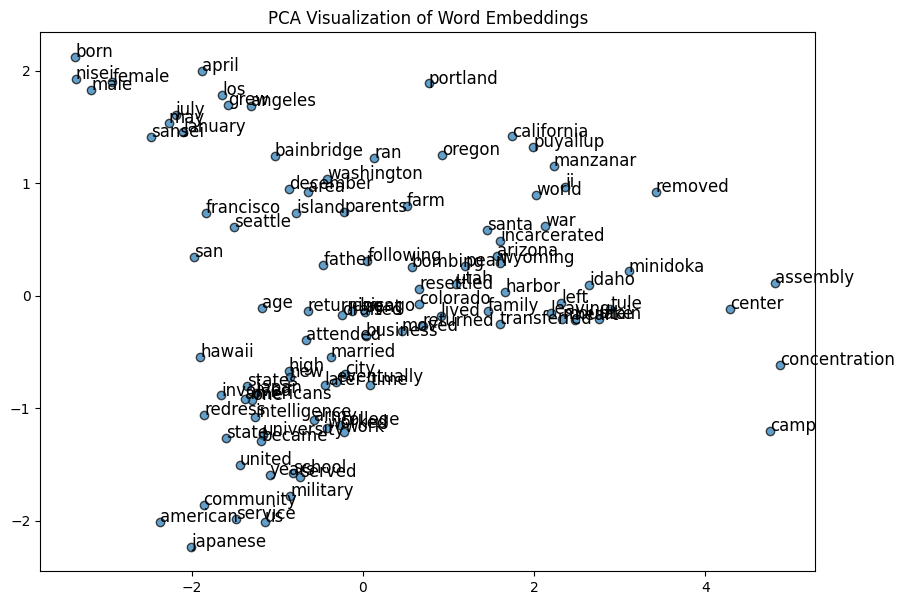

In [23]:
word2vec_model = Word2Vec(sentences=df['tokens'], vector_size=300, window=5, min_count=2, workers=4, sg=0)
word_vectors = word2vec_model.wv

words = list(word_vectors.index_to_key)[:100]  # Select first 100 words
vectors = np.array([word_vectors[word] for word in words])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(vectors)

plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], edgecolors='k', alpha=0.7)
for i, word in enumerate(words):
    plt.text(pca_result[i, 0], pca_result[i, 1], word, fontsize=12)
plt.title("PCA Visualization of Word Embeddings")
plt.show()

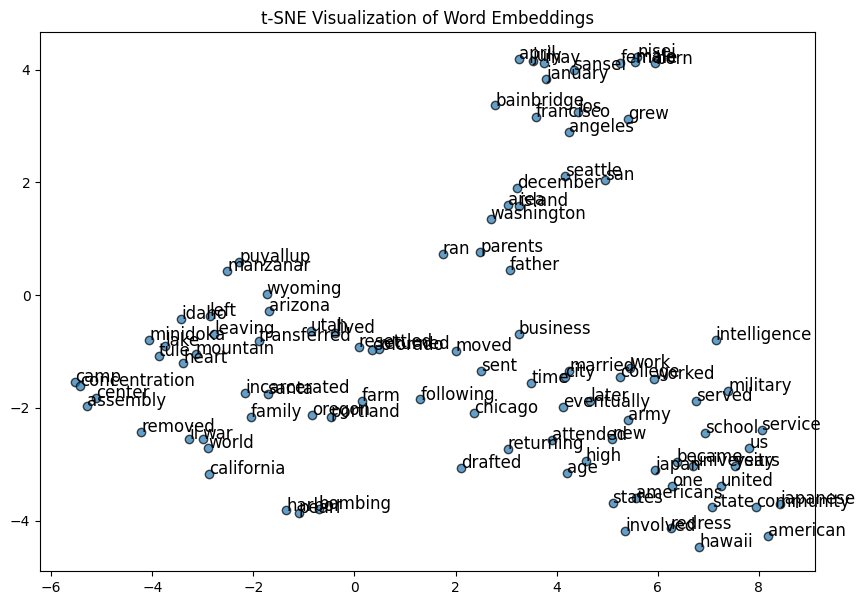

In [24]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(vectors)

plt.figure(figsize=(10, 7))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], edgecolors='k', alpha=0.7)
for i, word in enumerate(words):
    plt.text(tsne_result[i, 0], tsne_result[i, 1], word, fontsize=12)
plt.title("t-SNE Visualization of Word Embeddings")
plt.show()

In [25]:
def cosine_similarity(word1, word2):
    vec1 = word_vectors[word1]
    vec2 = word_vectors[word2]
    return 1 - cosine(vec1, vec2)

word_pairs = [('nisei', 'japanese'), ('interview', 'history'), ('family', 'community')]

for w1, w2 in word_pairs:
    if w1 in word_vectors and w2 in word_vectors:
        similarity = cosine_similarity(w1, w2)
        print(f"Cosine Similarity between '{w1}' and '{w2}': {similarity:.4f}")
    else:
        print(f"One or both words '{w1}', '{w2}' not in vocabulary.")


Cosine Similarity between 'nisei' and 'japanese': 0.7053
Cosine Similarity between 'interview' and 'history': 0.9938
Cosine Similarity between 'family' and 'community': 0.7744


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



I have used the coding for the analyze the data to get more constarint for enhancing the labelling, extartacted dataset has the more postive enad nuetral review with conating of rating of 5/5 reviews

In [58]:
df = pd.read_csv("/content/amazon_review.csv") #orginal dataset of amazon prodcut review
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0


In [59]:
df = df.drop(columns=["reviewerID", "asin", "reviewerName", "helpful", "unixReviewTime", "reviewTime"])


In [42]:
df

,reviewText,overall,summary,day_diff,helpful_yes,total_vote
0,No issues.,4.0,Four Stars,138,0,0
1,"Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,409,0,0
2,it works as expected. I should have sprung for...,4.0,nothing to really say....,715,0,0
3,This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,382,0,0
4,"Bought it with Retail Packaging, arrived legit...",5.0,best deal around,513,0,0
...,...,...,...,...,...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...,1.0,Do not waste your money.,503,0,0
4911,Used this for extending the capabilities of my...,5.0,Great item!,473,0,0
4912,Great card that is very fast and reliable. It ...,5.0,Fast and reliable memory card,252,0,0
4913,Good amount of space for the stuff I want to d...,5.0,Great little card,448,0,0


In [43]:
print(df['overall'].nunique())

print(df['overall'].value_counts())


5
overall
5.0    3922
4.0     527
1.0     244
3.0     142
2.0      80
Name: count, dtype: int64


In [44]:
highest_day_diff = df['day_diff'].max()
lowest_day_diff = df['day_diff'].min()

print(f"Highest value in 'day_diff': {highest_day_diff}")
print(f"Lowest value in 'day_diff': {lowest_day_diff}")

Highest value in 'day_diff': 1064
Lowest value in 'day_diff': 1


In [67]:
url = "https://raw.githubusercontent.com/KarthikTummala18/INFO-5731-Computational-Methods-for-Information-Systems-/main/Labelled_data.csv"
df = pd.read_csv(url)
print(df.head())


   document_id                                         clean_text sentiment
0            0                                         No issues.   Neutral
1            1  Purchased this for my device, it worked as adv...   Neutral
2            2  it works as expected. I should have sprung for...   Neutral
3            3  This think has worked out great.Had a diff. br...   Neutral
4            4  Bought it with Retail Packaging, arrived legit...   Neutral


To Labelling the data, catgorized the data as positive, negative and neutral
using the feartuers of reviewText,	overall	summary,	day_diff,	helpful_yes, and total_vote **bold text**

**Postive:** rating more than 4, helpful_yes and total_vote more than 6, day_difference more than year

**Neutral:** rating having 3 , helpful_yes and total_vote range of 3 and 6, day_difference more than year

**Negative:** rating  2, helpful_yes and total_vote below 3, day_difference more than 2 years

And also used the kyeword like great, excellent, perfect, love, best, awesome, fantastic, good, amazing, bad, worst, terrible, disappointing
not work, poor, awful, broken in reviewText and overall	summary featuers to classify the data

In [ ]:
# The GitHub link of your final csv file


# Link: https://raw.githubusercontent.com/KarthikTummala18/INFO-5731-Computational-Methods-for-Information-Systems-/main/Labelled_data.csv



# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

To complete this assisgnment, spent nearly 6 hours, the labeling the data takes me lot of time to classify the each review. In question 3, Visualize the word embedding model using PCA and T-sne, first i used the bio featuer, it not genretes the better visulize, later using the  name featuer got the understandable visulization. by practising the assginment, understand the NLP concepts and techniques